In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [2]:
(X_train,Y_train),(X_test,Y_test) = datasets.cifar10.load_data()
print(X_train.shape,X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
Y_train = Y_train.reshape(-1,)
Y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [5]:
classes = ["Airoplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

In [6]:
classes[9]

'Truck'

In [7]:
def plot_sample(X,Y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

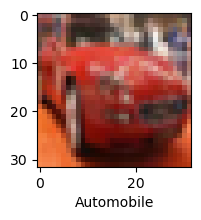

In [8]:
plot_sample(X_train,Y_train,5)

In [9]:
#Normalizing the data, hence the value are between 0-255 range for each channel R-G-B
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
CNN = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(1000,activation = 'relu'),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

CNN.compile(
    optimizer = 'adam',
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']

)

CNN.fit(X_train,Y_train,epochs=5)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = CNN.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print("Classification resport: - \n",classification_report(Y_test,Y_pred_classes))

In [11]:
cnn = keras.models.Sequential([
    #cnn
    keras.layers.Conv2D(filters= 32, kernel_size= (3,3), activation= 'relu', input_shape = (32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters= 64, kernel_size= (3,3), activation= 'relu'),
    keras.layers.MaxPooling2D((2,2)),

    #Dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax'),

])

cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

C:\Users\sivam\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.fit(X_train,Y_train,epochs = 25)

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.3755 - loss: 1.7176
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5934 - loss: 1.1594
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6530 - loss: 0.9950
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6882 - loss: 0.8928
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7135 - loss: 0.8289
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7251 - loss: 0.7838
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7464 - loss: 0.7286
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7582 - loss: 0.6900
Epoch 9/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7774 - loss: 0.6484
Epoch 10/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7864 - loss: 0.6086
Epoch 11/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8001 - loss: 0.5758
Epoch 12

In [13]:
cnn.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6855 - loss: 1.4299


[1.445326328277588, 0.675599992275238]

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = cnn.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print("Classification resport: - \n",classification_report(Y_test,Y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification resport: - 
               precision    recall  f1-score   support

           0       0.70      0.69      0.70      1000
           1       0.84      0.78      0.80      1000
           2       0.56      0.59      0.58      1000
           3       0.49      0.49      0.49      1000
           4       0.59      0.65      0.62      1000
           5       0.60      0.52      0.56      1000
           6       0.71      0.73      0.72      1000
           7       0.73      0.73      0.73      1000
           8       0.77      0.82      0.79      1000
           9       0.77      0.76      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [15]:
Y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

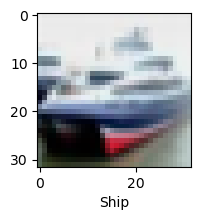

In [16]:
Y_test=Y_test.reshape(-1,)
plot_sample(X_test,Y_test,1)